STA 6704 Assignment 1_Nafis Anwari

In [29]:
import pandas as pd
import numpy as np
import math
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
import pylab
import matplotlib.pyplot as plt

Ans 2

In [2]:
def specialfunction(a):
    print("The Elements are: x1 =",a[0]," and x2 =",a[1])
    f_x = -2*math.exp(-(a[0]-1)**2-(a[1]-1)**2)  -  1*math.exp(-(a[0]+2)**2-(a[1]+3)**2)
    del_f_x1 = 4*(a[0]-1)*math.exp(-(a[0]-1)**2-(a[1]-1)**2)  +  2*(a[0]+2)*math.exp(-(a[0]+2)**2-(a[1]+3)**2)
    del_f_x2 = 4*(a[1]-1)*math.exp(-(a[0]-1)**2-(a[1]-1)**2) + 2*(a[1]+3)*math.exp(-(a[0]+2)**2-(a[1]+3)**2)
    del_fx = [del_f_x1,del_f_x2]
    print("value of f(x) is",f_x)
    print("value of df(x)/dx1 is",del_f_x1)
    print("value of df(x)/dx2 is",del_f_x2)
    print(del_fx[0],",", del_fx[1])
    return [f_x, del_fx]
    #return 

In [3]:
#Demonstration
b=[3,4]
print(type(b))
print(b[0],b[1])

<class 'list'>
3 4


In [4]:
specialfunction(b)

The Elements are: x1 = 3  and x2 = 4
value of f(x) is -4.5206588139621085e-06
value of df(x)/dx1 is 1.8082635255848434e-05
value of df(x)/dx2 is 2.712395288377265e-05
1.8082635255848434e-05 , 2.712395288377265e-05


[-4.5206588139621085e-06, [1.8082635255848434e-05, 2.712395288377265e-05]]

In [ ]:
#Rough starts
'''
#f(x)
-2*math.exp(-(3-1)**2-(4-1)**2)
-2*math.exp(-(b[0]-1)**2-(b[1]-1)**2)
-1*math.exp(-(3+2)**2-(4+3)**2)
-1*math.exp(-(b[0]+2)**2-(b[1]+3)**2)
-2*math.exp(-(3-1)**2-(4-1)**2)-1*math.exp(-(3+2)**2-(4+3)**2)
-2*math.exp(-(b[0]-1)**2-(b[1]-1)**2)-1*math.exp(-(b[0]+2)**2-(b[1]+3)**2)

#df(x1)
4*(3-1)*math.exp(-(3-1)**2-(4-1)**2)
4*(b[0]-1)*math.exp(-(b[0]-1)**2-(b[1]-1)**2)
2*(3+2)*math.exp(-(3+2)**2-(4+3)**2)
2*(b[0]+2)*math.exp(-(b[0]+2)**2-(b[1]+3)**2)
4*(3-1)*math.exp(-(3-1)**2-(4-1)**2) + 2*(3+2)*math.exp(-(3+2)**2-(4+3)**2)
4*(b[0]-1)*math.exp(-(b[0]-1)**2-(b[1]-1)**2)  +  2*(b[0]+2)*math.exp(-(b[0]+2)**2-(b[1]+3)**2)

#df(x2)
4*(4-1)*math.exp(-(3-1)**2-(4-1)**2)
4*(b[1]-1)*math.exp(-(b[0]-1)**2-(b[1]-1)**2)
2*(4+3)*math.exp(-(3+2)**2-(4+3)**2)
2*(b[1]+3)*math.exp(-(b[0]+2)**2-(b[1]+3)**2)
4*(4-1)*math.exp(-(3-1)**2-(4-1)**2) + 2*(4+3)*math.exp(-(3+2)**2-(4+3)**2)
4*(b[1]-1)*math.exp(-(b[0]-1)**2-(b[1]-1)**2) + 2*(b[1]+3)*math.exp(-(b[0]+2)**2-(b[1]+3)**2)
'''
#Rough ends

Ans 3

In [5]:
# Run this cell 6 times: 2 initial values * 3 alpha values = 6 times
from sympy import *
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')


f = -2*exp(-(x-1)**2-(y-1)**2)-exp(-(x+2)**2-(y+3)**2)
# First partial derivative with respect to x
fpx = f.diff(x)

# First partial derivative with respect to y
fpy = f.diff(y)

# Gradient
grad = [fpx,fpy]

# Data
theta = 0  #initial value of x  # The initial value can vary from [0,0] to [-1,-1] as per question
theta1 = 0 #initial value of y
alpha = .01 # varies: 0.1, 0.01, 0.001
iterations = 0
check = 0
precision = 1/100000000
printData = True
maxIterations = 100000

x_data = []
y_data= []
fxy_data = []

start_time = time.time()
start_time2= time.process_time()

while True:
    temptheta = theta - alpha*N(fpx.subs(x,theta).subs(y,theta1)).evalf()
    temptheta1 = theta1 - alpha*N(fpy.subs(y,theta1)).subs(x,theta).evalf()
    f_xy = -2*exp(-(temptheta-1)**2-(temptheta1-1)**2)-exp(-(temptheta+2)**2-(temptheta1+3)**2)
    
    
    x_data.append(temptheta)
    y_data.append(temptheta1)
    fxy_data.append(f_xy)
    #print(temptheta,temptheta1,f_xy)

    #If the number of iterations goes up too much, maybe theta (and/or theta1)
    #is diverging! Let's stop the loop and try to understand.
    iterations += 1
    print("iteration:",iterations, " x_updated:",round(temptheta,4), " y_updated:",round(temptheta1,4), 
          " function value:",round(f_xy,4))
    
    if iterations > maxIterations:
        print("Too many iterations. Adjust alpha and make sure that the function is convex!")
        printData = False
        break

    #If the value of theta changes less of a certain amount, our goal is met.
    if abs(temptheta-theta) < precision and abs(temptheta1-theta1) < precision:
        break

    #Simultaneous update
    theta = temptheta
    theta1 = temptheta1

if printData:
    print("The function "+str(f)+" converges to a minimum")
    print("Number of iterations:",iterations,sep=" ")
    print("theta (x0) =",temptheta,sep=" ")
    print("theta1 (y0) =",temptheta1,sep=" ")

end_time = time.time()
end_time2= time.process_time()
print("Wall time=", end_time-start_time, "s")
print("CPU execution time=", end_time2-start_time2, "s")
# Source: https://pynative.com/python-get-execution-time-of-program/
# Source: http://firsttimeprogrammer.blogspot.com/2014/09/multivariable-gradient-descent.html
# Source: https://towardsai.net/p/tutorials/the-gradient-descent-algorithm

iteration: 1  x_updated: 0.0054  y_updated: 0.0054  function value: -0.2766
iteration: 2  x_updated: 0.0109  y_updated: 0.0109  function value: -0.2827
iteration: 3  x_updated: 0.0165  y_updated: 0.0165  function value: -0.2890
iteration: 4  x_updated: 0.0222  y_updated: 0.0222  function value: -0.2955
iteration: 5  x_updated: 0.0280  y_updated: 0.0280  function value: -0.3022
iteration: 6  x_updated: 0.0338  y_updated: 0.0338  function value: -0.3092
iteration: 7  x_updated: 0.0398  y_updated: 0.0398  function value: -0.3164
iteration: 8  x_updated: 0.0459  y_updated: 0.0459  function value: -0.3238
iteration: 9  x_updated: 0.0521  y_updated: 0.0521  function value: -0.3316
iteration: 10  x_updated: 0.0584  y_updated: 0.0584  function value: -0.3395
iteration: 11  x_updated: 0.0648  y_updated: 0.0648  function value: -0.3478
iteration: 12  x_updated: 0.0713  y_updated: 0.0713  function value: -0.3563
iteration: 13  x_updated: 0.0779  y_updated: 0.0779  function value: -0.3651
iteratio

In [26]:
#x_data_ij = i initial value, and j alpha
'''
i=[0,0] or [-1,-1]
j = 0.1, 0.01 or 0.001
'''

#initial value = [0,0], alpha = 0.1
#x_data_11 = x_data
#y_data_11 = y_data
#fxy_data_11 = fxy_data

#initial value = [0,0], alpha = 0.01
#x_data_12 = x_data
#y_data_12 = y_data
#fxy_data_12 = fxy_data

#initial value = [0,0], alpha = 0.001
#x_data_13 = x_data
#y_data_13 = y_data
#fxy_data_13 = fxy_data

#initial value = [-1,-1], alpha = 0.1
#x_data_21 = x_data
#y_data_21 = y_data
#fxy_data_21 = fxy_data

#initial value = [-1,-1], alpha = 0.01
#x_data_22 = x_data
#y_data_22 = y_data
#fxy_data_22 = fxy_data

#initial value = [-1,-1], alpha = 0.001
#x_data_23 = x_data
#y_data_23 = y_data
#fxy_data_23 = fxy_data



len(fxy_data)  #check

16279

In [51]:
model_data_11 = pd.DataFrame ({"x_data":x_data_11,"y_data":y_data_11,"fxy_data":fxy_data_11})
model_data_11['filename'] = 'data_11'
model_data_11['iteration_no'] = model_data_11.index+1

model_data_12 = pd.DataFrame ({"x_data":x_data_12,"y_data":y_data_12,"fxy_data":fxy_data_12})
model_data_12['filename'] = 'data_12'
model_data_12['iteration_no'] = model_data_12.index+1

model_data_13 = pd.DataFrame ({"x_data":x_data_13,"y_data":y_data_13,"fxy_data":fxy_data_13})
model_data_13['filename'] = 'data_13'
model_data_13['iteration_no'] = model_data_13.index+1

model_data_21 = pd.DataFrame ({"x_data":x_data_21,"y_data":y_data_21,"fxy_data":fxy_data_21})
model_data_21['filename'] = 'data_21'
model_data_21['iteration_no'] = model_data_21.index+1

model_data_22 = pd.DataFrame ({"x_data":x_data_22,"y_data":y_data_22,"fxy_data":fxy_data_22})
model_data_22['filename'] = 'data_22'
model_data_22['iteration_no'] = model_data_22.index+1

model_data_23 = pd.DataFrame ({"x_data":x_data_23,"y_data":y_data_23,"fxy_data":fxy_data_23})
model_data_23['filename'] = 'data_23'
model_data_23['iteration_no'] = model_data_23.index+1

model_data = pd.concat([model_data_11, model_data_12, model_data_13,
                        model_data_21, model_data_22, model_data_23], 
                       axis = 0,ignore_index=True)
#model_data
model_data=model_data[['iteration_no','filename','x_data', 'y_data', 'fxy_data']]

model_data.to_csv("iteration_result_data.csv", index = False)

In [3]:
model_data.columns

Index(['iteration_no', 'filename', 'x_data', 'y_data', 'fxy_data'], dtype='object')

In [5]:
model_data['filename'].unique()

array(['data_11', 'data_12', 'data_13', 'data_21', 'data_22', 'data_23'],
      dtype=object)

In [19]:
# Importing back the data as lists:

model_data = pd.read_csv("iteration_result_data.csv")
model_data


#initial value = [0,0], alpha = 0.1
x_data_11 = model_data[model_data['filename']=='data_11']['x_data'].values.tolist()
y_data_11 = model_data[model_data['filename']=='data_11']['y_data'].values.tolist()
fxy_data_11 = model_data[model_data['filename']=='data_11']['fxy_data'].values.tolist()

#initial value = [0,0], alpha = 0.01
x_data_12 = model_data[model_data['filename']=='data_12']['x_data'].values.tolist()
y_data_12 = model_data[model_data['filename']=='data_12']['y_data'].values.tolist()
fxy_data_12 = model_data[model_data['filename']=='data_12']['fxy_data'].values.tolist()

#initial value = [0,0], alpha = 0.001
x_data_13 = model_data[model_data['filename']=='data_13']['x_data'].values.tolist()
y_data_13 = model_data[model_data['filename']=='data_13']['y_data'].values.tolist()
fxy_data_13 = model_data[model_data['filename']=='data_13']['fxy_data'].values.tolist()

#initial value = [-1,-1], alpha = 0.1
x_data_21 = model_data[model_data['filename']=='data_21']['x_data'].values.tolist()
y_data_21 = model_data[model_data['filename']=='data_21']['y_data'].values.tolist()
fxy_data_21 = model_data[model_data['filename']=='data_21']['fxy_data'].values.tolist()

#initial value = [-1,-1], alpha = 0.01
x_data_22 = model_data[model_data['filename']=='data_22']['x_data'].values.tolist()
y_data_22 = model_data[model_data['filename']=='data_22']['y_data'].values.tolist()
fxy_data_22 = model_data[model_data['filename']=='data_22']['fxy_data'].values.tolist()

#initial value = [-1,-1], alpha = 0.01
x_data_23 = model_data[model_data['filename']=='data_23']['x_data'].values.tolist()
y_data_23 = model_data[model_data['filename']=='data_23']['y_data'].values.tolist()
fxy_data_23 = model_data[model_data['filename']=='data_23']['fxy_data'].values.tolist()

# Check
print(len(x_data_23))
print(type(x_data_23))

16279
<class 'list'>


In [25]:
type (x_data)
# type(y_data)
# type(fxy_data)

list

Ans 3

In [59]:
xx = np.linspace(-6,6,60)
yy = np.linspace(-6,6,60)
X, Y = np.meshgrid(xx, yy)
Z = -2*np.exp((-(X-1)**2 - (Y-1)**2)) - np.exp(-(X+2)**2 - (Y+3)**2)


C:\Users\User\AppData\Local\Temp\ipykernel_9352\4008545544.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


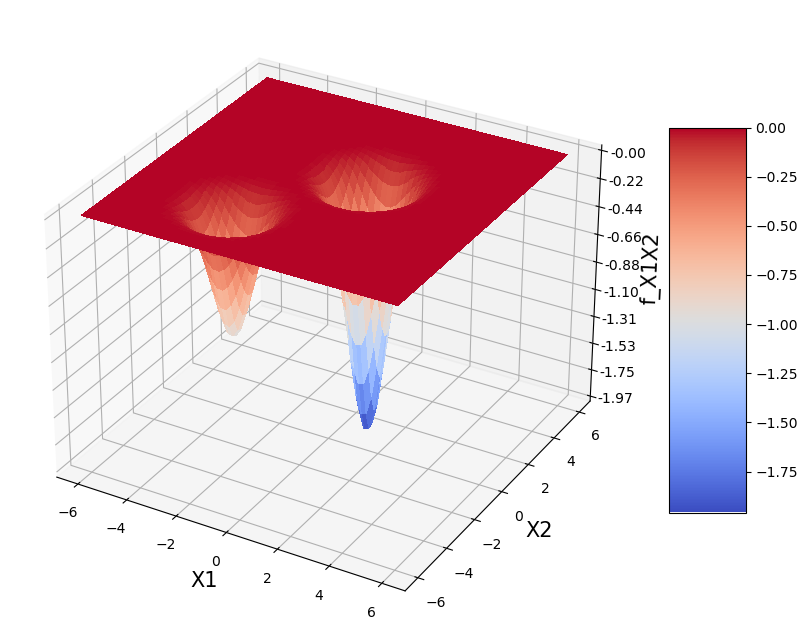

In [24]:
fig = figure(3,figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X1', fontsize=15, rotation=0)
ax.set_ylabel('X2', fontsize=15, rotation=0)
ax.set_zlabel('f_X1X2', fontsize=15, rotation=0)
#ax.set_xlabel('$X$', fontsize=20, rotation=150)
#ax.set_ylabel('$Y$')
#ax.set_zlabel(r'$\gamma$', fontsize=30, rotation=60)
show()

C:\Users\User\AppData\Local\Temp\ipykernel_9352\217770205.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


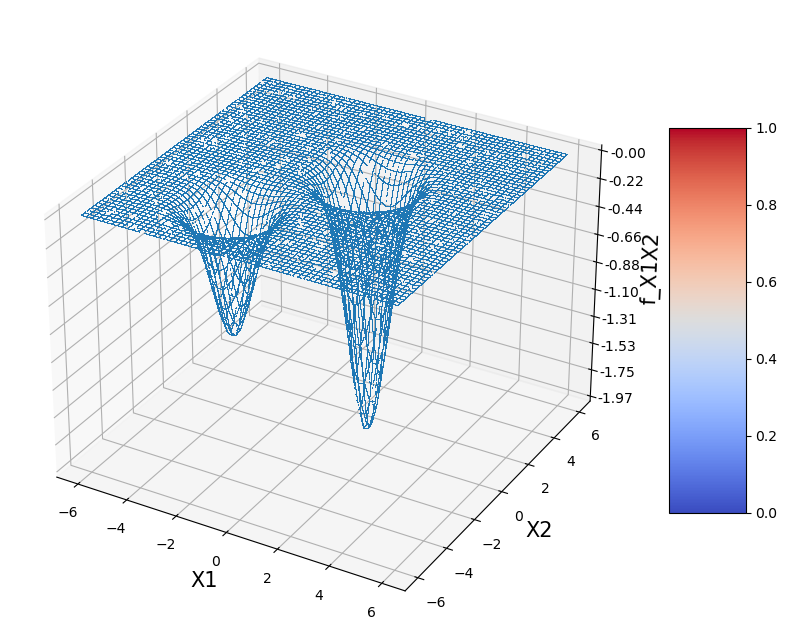

In [26]:
fig = figure(3,figsize=(10,10))

ax = fig.gca(projection='3d')
wiref = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.0025, antialiased=False)
#ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(wiref, shrink=0.5, aspect=5)
ax.set_xlabel('X1', fontsize=15, rotation=0)
ax.set_ylabel('X2', fontsize=15, rotation=0)
ax.set_zlabel('f_X1X2', fontsize=15, rotation=0)
#ax.set_xlabel('$X$', fontsize=20, rotation=150)
#ax.set_ylabel('$Y$')
#ax.set_zlabel(r'$\gamma$', fontsize=30, rotation=60)
show()


In [121]:
from sympy import *
import sympy

data = pd.DataFrame ({"x_data":x_data_23,"y_data":y_data_23,"fxy_data":fxy_data_23})
data['pi*x'] = data["x_data"]*np.pi
data['pi*y'] = data["y_data"]*np.pi
data['pi*fxy'] = data["fxy_data"]*np.pi

data['u']=(data['pi*x'].apply(lambda X: sin(X)))*(data['pi*y'].apply(lambda X: cos(X)))*(data['pi*fxy'].apply(lambda X: cos(X)))
data['v']=(-1*data['pi*x'].apply(lambda X: cos(X)))*(data['pi*y'].apply(lambda X: sin(X)))*(data['pi*fxy'].apply(lambda X: cos(X)))
data['w'] = np.sqrt(2.0 / 3.0)*(data['pi*x'].apply(lambda X: cos(X)))*(data['pi*y'].apply(lambda X: cos(X)))*(data['pi*fxy'].apply(lambda X: sin(X)))

In [122]:
xx = np.linspace(-6,6,60)
yy = np.linspace(-6,6,60)
X, Y = np.meshgrid(xx, yy)
Z = -2*np.exp((-(X-1)**2 - (Y-1)**2)) - np.exp(-(X+2)**2 - (Y+3)**2)

C:\Users\User\AppData\Local\Temp\ipykernel_9352\3329781853.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


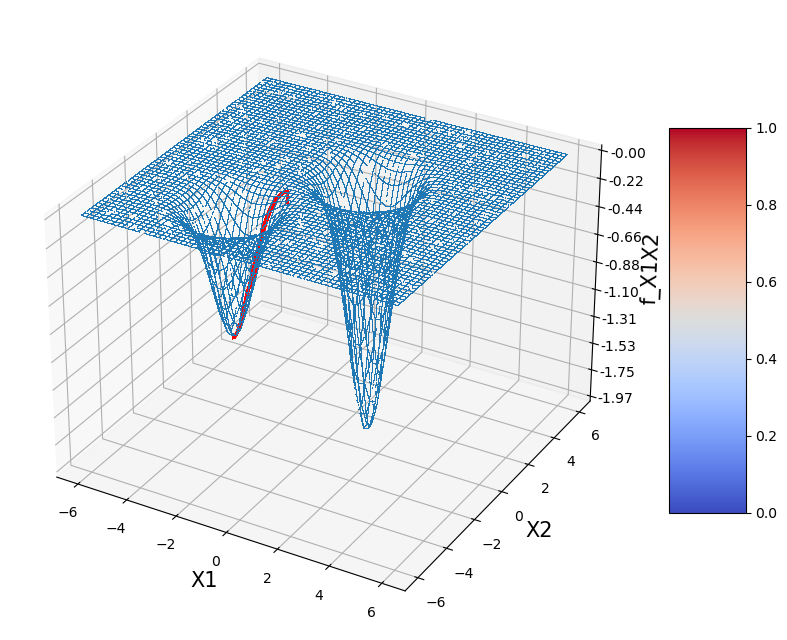

In [123]:
fig = figure(3,figsize=(10,10))

ax = fig.gca(projection='3d')
wiref = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.0025, antialiased=False)
#ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(wiref, shrink=0.5, aspect=5)
ax.set_xlabel('X1', fontsize=15, rotation=0)
ax.set_ylabel('X2', fontsize=15, rotation=0)
ax.set_zlabel('f_X1X2', fontsize=15, rotation=0)


# Make the direction data for the arrows

ax.quiver(data['x_data'], data['y_data'], data['fxy_data'], data['u'], data['v'], data['w'], length=0.1, normalize=True, color = 'r')


C:\Users\User\AppData\Local\Temp\ipykernel_9352\2438696660.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


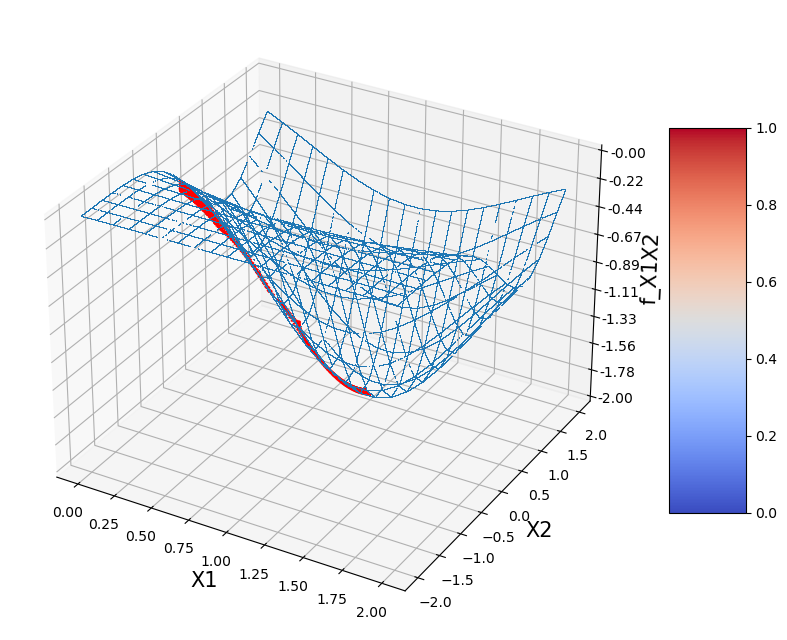

In [92]:
# initial value =[0,0]
'''
xx = np.linspace(-0,2,20)
yy = np.linspace(-2,2,20)
X, Y = np.meshgrid(xx, yy)
Z = -2*np.exp((-(X-1)**2 - (Y-1)**2)) - np.exp(-(X+2)**2 - (Y+3)**2)

fig = figure(3,figsize=(10,10))

ax = fig.gca(projection='3d')
wiref = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.0025, antialiased=False)
#ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(wiref, shrink=0.5, aspect=5)
ax.set_xlabel('X1', fontsize=15, rotation=0)
ax.set_ylabel('X2', fontsize=15, rotation=0)
ax.set_zlabel('f_X1X2', fontsize=15, rotation=0)
#ax.set_xlabel('$X$', fontsize=20, rotation=150)
#ax.set_ylabel('$Y$')
#ax.set_zlabel(r'$\gamma$', fontsize=30, rotation=60)



# Make the direction data for the arrows




ax.quiver(data['x_data'], data['y_data'], data['fxy_data'], 
          data['u'], data['v'], data['w'], length=0.1, normalize=True, color = 'r')
plt.show()
'''

C:\Users\User\AppData\Local\Temp\ipykernel_9352\2033246484.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


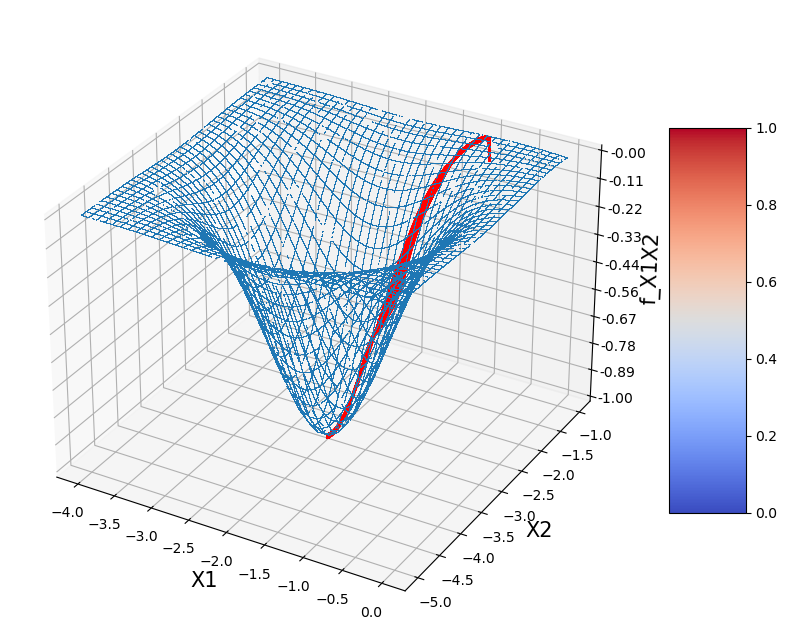

In [124]:
# initial value =[-1,-1]
xx = np.linspace(-4,0,40)
yy = np.linspace(-5,-1,40)
X, Y = np.meshgrid(xx, yy)
Z = -2*np.exp((-(X-1)**2 - (Y-1)**2)) - np.exp(-(X+2)**2 - (Y+3)**2)

fig = figure(3,figsize=(10,10))

ax = fig.gca(projection='3d')
wiref = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.0025, antialiased=False)
#ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(wiref, shrink=0.5, aspect=5)
ax.set_xlabel('X1', fontsize=15, rotation=0)
ax.set_ylabel('X2', fontsize=15, rotation=0)
ax.set_zlabel('f_X1X2', fontsize=15, rotation=0)
#ax.set_xlabel('$X$', fontsize=20, rotation=150)
#ax.set_ylabel('$Y$')
#ax.set_zlabel(r'$\gamma$', fontsize=30, rotation=60)



# Make the direction data for the arrows




ax.quiver(data['x_data'], data['y_data'], data['fxy_data'], 
          data['u'], data['v'], data['w'], length=0.1, normalize=True, color = 'r')

'''
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
'''

plt.show()

Text(0, 0.5, 'f(x)')

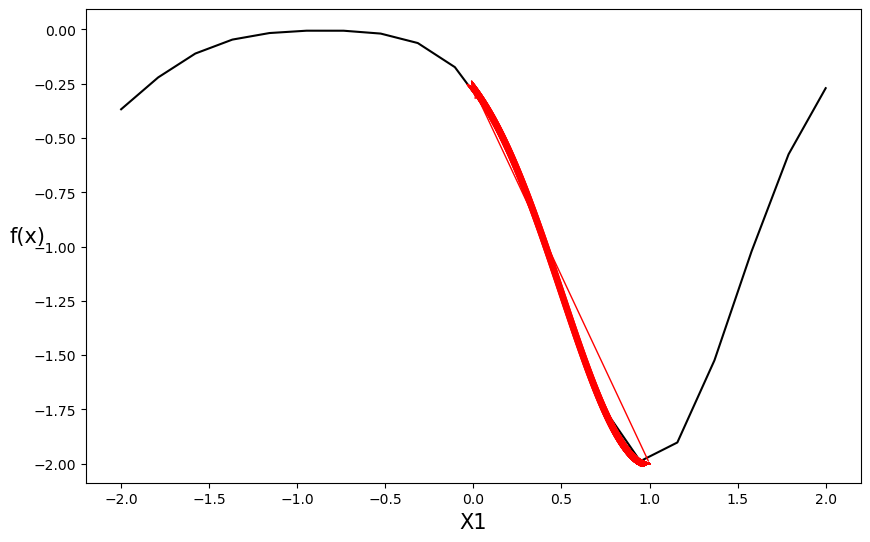

In [74]:
xx = np.linspace(-2,2,20)
yy = np.linspace(-2,2,20)
fxxyy = -2*np.exp(-(xx-1)**2-(yy-1)**2)  -  1*np.exp(-(xx+2)**2-(yy+3)**2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))
ax.plot(xx, fxxyy, 'k')
for j in range(len(fxy_data_13)):
    ax.annotate('', xy=(x_data_13[j], fxy_data_13[j]), xytext=(x_data_13[j-1], fxy_data_13[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
ax.set_xlabel('X1', fontsize=15, rotation=0)
ax.set_ylabel('f(x)', fontsize=15, rotation=0)    

Text(0, 0.5, 'f(x)')

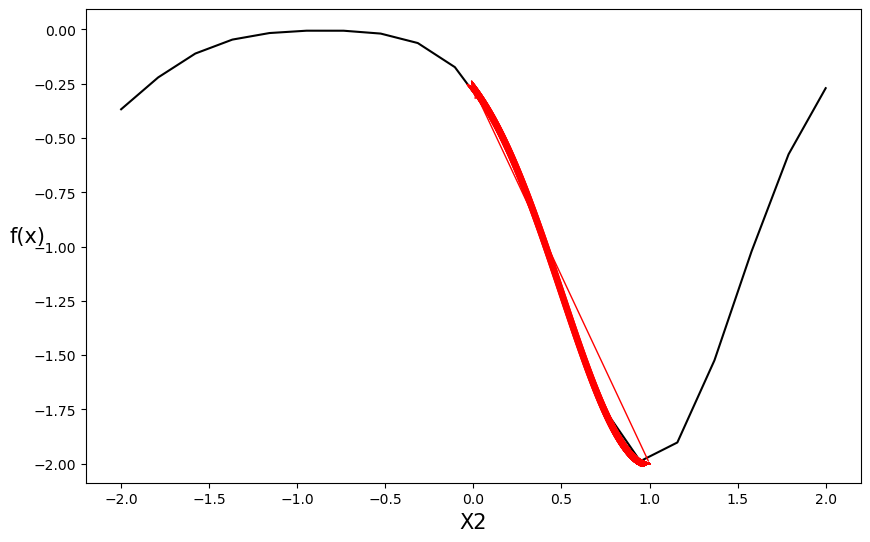

In [80]:
xx = np.linspace(-2,2,20)
yy = np.linspace(-2,2,20)
fxxyy = -2*np.exp(-(xx-1)**2-(yy-1)**2)  -  1*np.exp(-(xx+2)**2-(yy+3)**2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))
ax.plot(xx, fxxyy, 'k')
for j in range(len(fxy_data_13)):
    ax.annotate('', xy=(y_data_13[j], fxy_data_13[j]), xytext=(y_data_13[j-1], fxy_data_13[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
ax.set_xlabel('X2', fontsize=15, rotation=0)
ax.set_ylabel('f(x)', fontsize=15, rotation=0) 

Text(0, 0.5, 'f(x)')

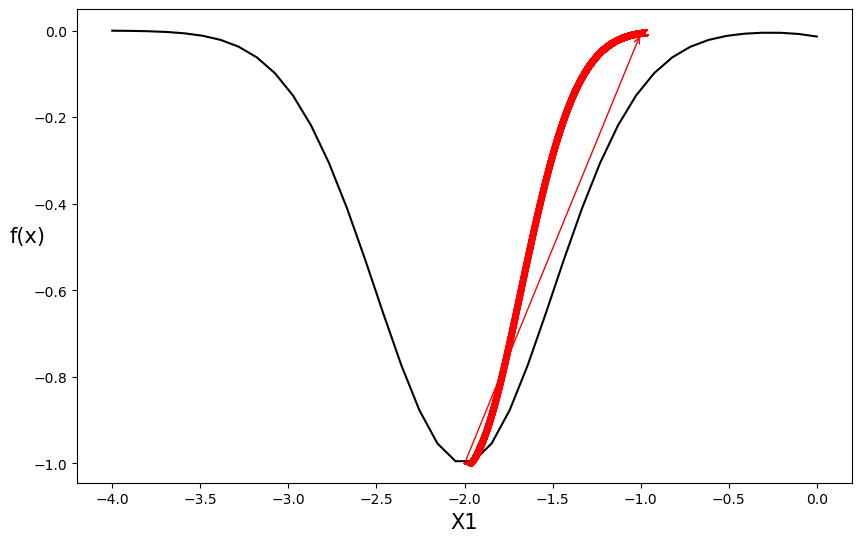

In [125]:
xx = np.linspace(-4,0,40)
yy = np.linspace(-5,-1,40)
fxxyy = -2*np.exp(-(xx-1)**2-(yy-1)**2)  -  1*np.exp(-(xx+2)**2-(yy+3)**2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))
ax.plot(xx, fxxyy, 'k')
for j in range(len(fxy_data_23)):
    ax.annotate('', xy=(x_data_23[j], fxy_data_23[j]), xytext=(x_data_23[j-1], fxy_data_23[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
ax.set_xlabel('X1', fontsize=15, rotation=0)
ax.set_ylabel('f(x)', fontsize=15, rotation=0)    

Text(0, 0.5, 'f(x)')

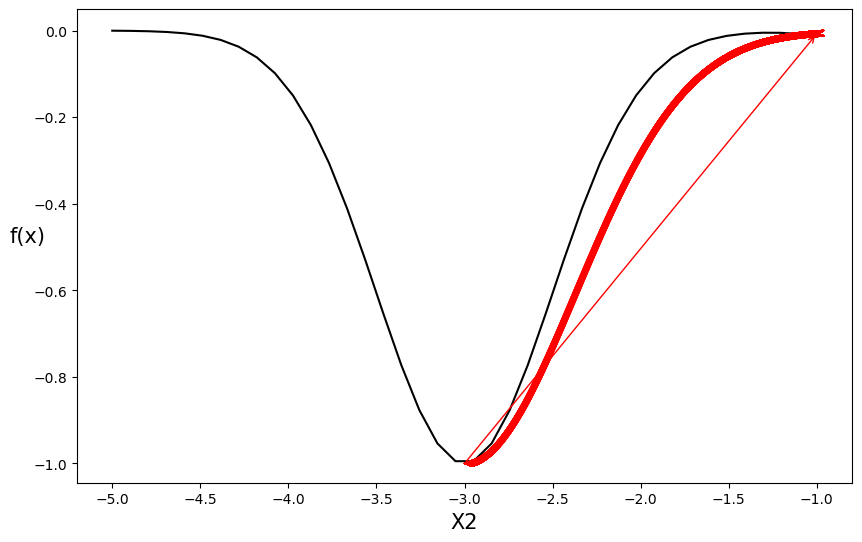

In [126]:
xx = np.linspace(-4,0,40)
yy = np.linspace(-5,-1,40)
fxxyy = -2*np.exp(-(xx-1)**2-(yy-1)**2)  -  1*np.exp(-(xx+2)**2-(yy+3)**2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))
ax.plot(yy, fxxyy, 'k')
for j in range(len(fxy_data_23)):
    ax.annotate('', xy=(y_data_23[j], fxy_data_23[j]), xytext=(y_data_23[j-1], fxy_data_23[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
ax.set_xlabel('X2', fontsize=15, rotation=0)
ax.set_ylabel('f(x)', fontsize=15, rotation=0) 

In [76]:
xx = np.linspace(-5,5,50)
yy = np.linspace(-5,5,50)
X, Y = np.meshgrid(xx, yy)
Z = -2*np.exp((-(X-1)**2 - (Y-1)**2)) - np.exp(-(X+2)**2 - (Y+3)**2)


Text(0, 0.5, 'X2')

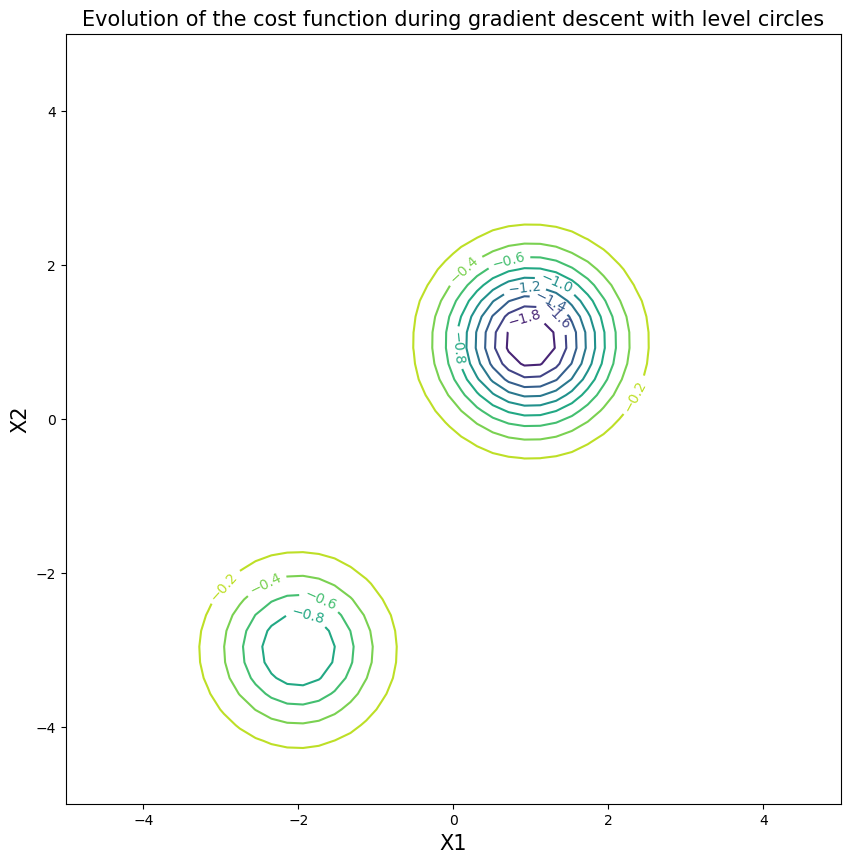

In [77]:
ax = figure(3,figsize=(10,10))
contours = plt.contour(X, Y, Z, 10)
plt.clabel(contours, inline = True, fontsize = 10)

    
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)

Text(0, 0.5, 'X2')

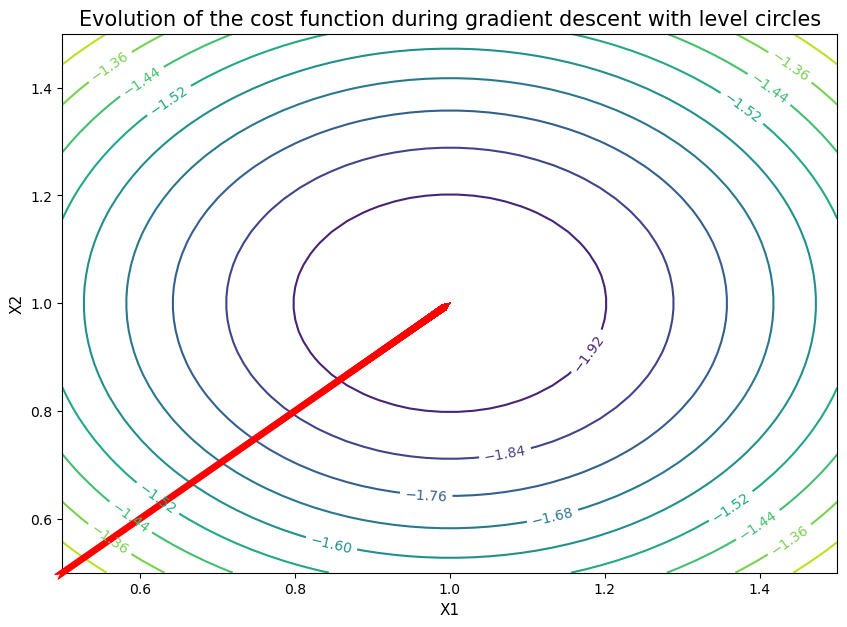

In [79]:
xx = np.linspace(0.5,1.5,50)
yy = np.linspace(0.5,1.5,50)
X, Y = np.meshgrid(xx, yy)
Z = -2*np.exp((-(X-1)**2 - (Y-1)**2)) - np.exp(-(X+2)**2 - (Y+3)**2)

fig = plt.figure(figsize = (10,7))
contours = plt.contour(X, Y, Z, 10)
plt.clabel(contours, inline = True, fontsize = 10)


for j in range(len(x_data_13)):
    plt.annotate('', xy=(x_data_13[j], y_data_13[j]), xytext=(x_data_13[j-1], y_data_13[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
    
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.xlabel('X1', fontsize=11)
plt.ylabel('X2', fontsize=11)

Text(0, 0.5, 'X2')

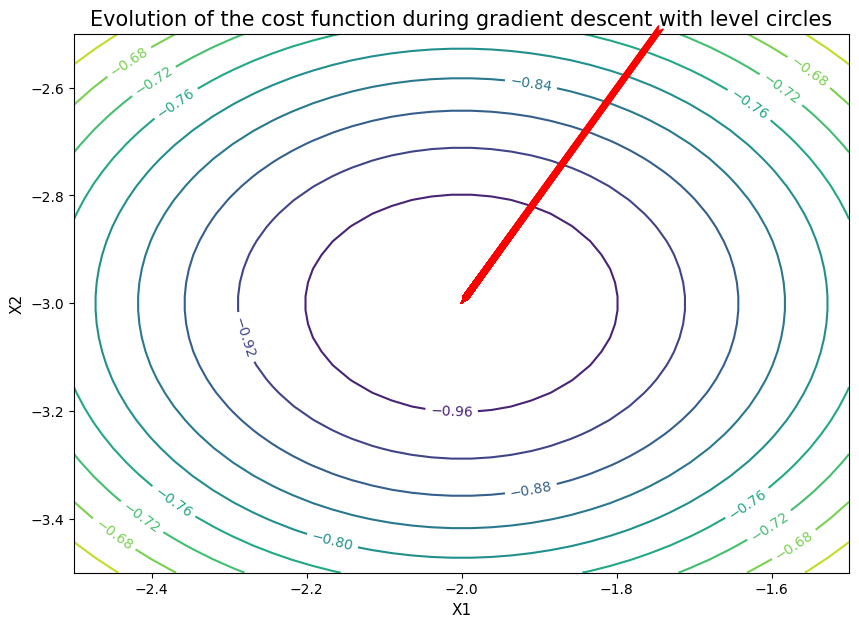

In [127]:
xx = np.linspace(-2.5,-1.5,40)
yy = np.linspace(-3.5,-2.5,40)
X, Y = np.meshgrid(xx, yy)
Z = -2*np.exp((-(X-1)**2 - (Y-1)**2)) - np.exp(-(X+2)**2 - (Y+3)**2)

fig = plt.figure(figsize = (10,7))
contours = plt.contour(X, Y, Z, 10)
plt.clabel(contours, inline = True, fontsize = 10)


for j in range(len(x_data_23)):
    plt.annotate('', xy=(x_data_23[j], y_data_23[j]), xytext=(x_data_23[j-1], y_data_23[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
    
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.xlabel('X1', fontsize=11)
plt.ylabel('X2', fontsize=11)

Text(0, 0.5, 'f(x)')

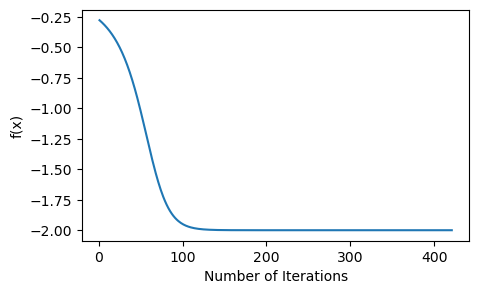

In [94]:
'''
fig = plt.figure(figsize = (5,3))
plot(data.index+1,data['fxy_data'])
plt.xlabel("Number of Iterations")
plt.ylabel("f(x)")
'''

In [129]:
import numpy as np

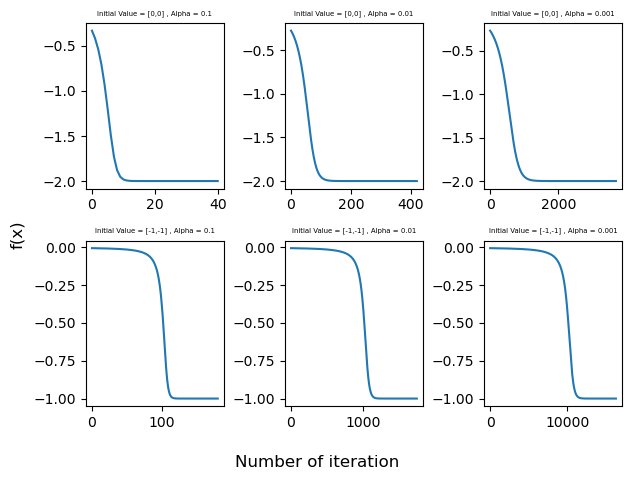

In [141]:
#fxy_data_23
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3)
ax1.plot(np.arange(0,len(fxy_data_11)),fxy_data_11)
ax1.set_title('Initial Value = [0,0] , Alpha = 0.1',fontsize = 5)
ax2.plot(np.arange(0,len(fxy_data_12)),fxy_data_12)
ax2.set_title('Initial Value = [0,0] , Alpha = 0.01',fontsize = 5)
ax3.plot(np.arange(0,len(fxy_data_13)),fxy_data_13)
ax3.set_title('Initial Value = [0,0] , Alpha = 0.001',fontsize = 5)
ax4.plot(np.arange(0,len(fxy_data_21)),fxy_data_21)
ax4.set_title('Initial Value = [-1,-1] , Alpha = 0.1',fontsize = 5)
ax5.plot(np.arange(0,len(fxy_data_22)),fxy_data_22)
ax5.set_title('Initial Value = [-1,-1] , Alpha = 0.01',fontsize = 5)
ax6.plot(np.arange(0,len(fxy_data_23)),fxy_data_23)
ax6.set_title('Initial Value = [-1,-1] , Alpha = 0.001',fontsize = 5)
fig.supxlabel('Number of iteration', fontsize=12)
fig.supylabel('f(x)', fontsize=12)
plt.tight_layout()
plt.savefig('Iteration.png',dpi = 300)
plt.show()

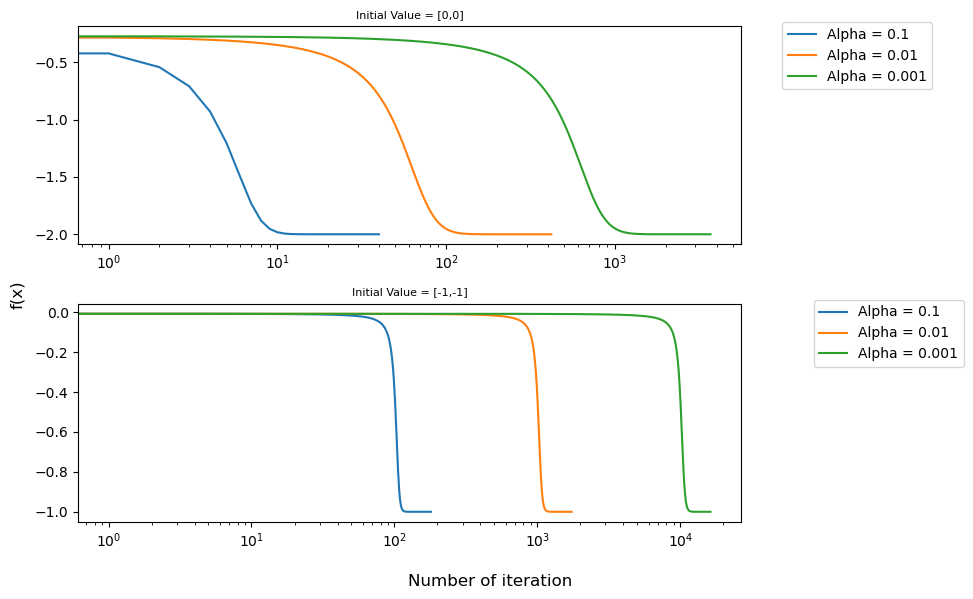

In [155]:
#Superimposed Figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
ax1.semilogx(np.arange(0,len(fxy_data_11)),fxy_data_11, label='Alpha = 0.1')
ax1.semilogx(np.arange(0,len(fxy_data_12)),fxy_data_12, label='Alpha = 0.01')
ax1.semilogx(np.arange(0,len(fxy_data_13)),fxy_data_13, label='Alpha = 0.001')
ax1.set_title('Initial Value = [0,0]',fontsize = 8)
ax1.legend(bbox_to_anchor=(1.3, 1.05))
ax2.semilogx(np.arange(0,len(fxy_data_21)),fxy_data_21, label='Alpha = 0.1')
ax2.semilogx(np.arange(0,len(fxy_data_22)),fxy_data_22, label='Alpha = 0.01')
ax2.semilogx(np.arange(0,len(fxy_data_23)),fxy_data_23, label='Alpha = 0.001')
ax2.set_title('Initial Value = [-1,-1]',fontsize = 8)
ax2.legend(bbox_to_anchor=(1.1, 1.05))
fig.supxlabel('Number of iteration', fontsize=12)
fig.supylabel('f(x)', fontsize=12)
plt.tight_layout()
plt.savefig('Iterations_Superimposed.png',dpi = 300)
plt.show() 

# ax1.plot() would give normal graphs